<a href="https://colab.research.google.com/github/patdring/ExplainableAI/blob/master/TracInCPFast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TracInCPFast

This Jupyter Notebook is for training a Convolutional Neural Network (CNN) on the German Traffic Sign Recognition Benchmark (GTSRB) dataset using PyTorch.

The code begins with importing the required PyTorch modules for building and training the CNN. It then defines a SimpleCNN class that inherits from the nn.Module class, which is a base class for all neural network modules in PyTorch. This SimpleCNN class defines the CNN architecture using various convolutional, activation, pooling, and fully connected layers.

After defining the CNN architecture, the code loads the GTSRB dataset, applies some data transformations such as resizing, normalization, and converting to tensors, and creates a data loader for training the CNN. The CNN is then initialized with the SimpleCNN class and the loss function and optimizer are defined.

The code then trains the CNN for a specified number of epochs and saves checkpoints at each epoch. It prints the training loss after every 20 mini-batches.

After training the CNN, the code uses the TracInCPFast package to compute the influence function for a test sample with label 2. It first loads the saved checkpoints, creates the TracInCPFast influence function, and then computes the influential training samples using the influence function. It finds the top 5 influential samples and plots them. Finally, it uses the Captum package to calculate the Integrated Gradients of the test sample with respect to its predicted label.

This Jupyter notebook is based on:

* https://captum.ai/tutorials/TracInCP_Tutorial
* https://arxiv.org/pdf/1711.11279.pdf

#### Installing Captum Library

The following line installs version 0.6.0 of the Captum library.

This version is used because it is compatible with the other libraries used in this notebook. 

In [ ]:
!pip install matplotlib==3.6 captum==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Configuring Matplotlib for Displaying Images

The following line configures Matplotlib to display images without padding.

This configuration is necessary because Matplotlib adds padding around images by default, which can affect the layout of the notebook. Setting the `bbox_inches` parameter to `None` removes the padding and ensures that images are displayed at their original size without any cropping or scaling.

In [ ]:
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

# Define and Train a (simple) CNN 


This cell trains a Convolutional Neural Network (CNN) using the PyTorch framework to recognize traffic signs. It defines a CNN architecture with two convolutional layers, two max pooling layers, and two fully connected layers. It loads the training dataset and applies various transformations to it. It initializes the CNN, sets the loss function and optimizer, and trains the model for a specified number of epochs. After each epoch, it saves the model checkpoints.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 43)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 8 * 8)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Load the dataset
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64
trainset = torchvision.datasets.GTSRB(root='./data', split='train',
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Initialize the CNN and define the loss function and optimizer
net = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model and save checkpoints
import os

# Create parent directory for checkpoints
os.makedirs('./checkpoints', exist_ok=True)
checkpoint_dir = './checkpoints/'
num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    checkpoint_path = checkpoint_dir + f'epoch{epoch}.pt'
    torch.save(net.state_dict(), checkpoint_path)

print('Finished Training')


[1,    20] loss: 0.375
[1,    40] loss: 0.374
[1,    60] loss: 0.373
[1,    80] loss: 0.372
[1,   100] loss: 0.371
[1,   120] loss: 0.368
[1,   140] loss: 0.365
[1,   160] loss: 0.363
[1,   180] loss: 0.355
[1,   200] loss: 0.356
[1,   220] loss: 0.354
[1,   240] loss: 0.352
[1,   260] loss: 0.350
[1,   280] loss: 0.350
[1,   300] loss: 0.352
[1,   320] loss: 0.348
[1,   340] loss: 0.349
[1,   360] loss: 0.347
[1,   380] loss: 0.349
[1,   400] loss: 0.350
[2,    20] loss: 0.346
[2,    40] loss: 0.345
[2,    60] loss: 0.344
[2,    80] loss: 0.343
[2,   100] loss: 0.344
[2,   120] loss: 0.339
[2,   140] loss: 0.339
[2,   160] loss: 0.337
[2,   180] loss: 0.342
[2,   200] loss: 0.336
[2,   220] loss: 0.334
[2,   240] loss: 0.336
[2,   260] loss: 0.336
[2,   280] loss: 0.331
[2,   300] loss: 0.330
[2,   320] loss: 0.330
[2,   340] loss: 0.331
[2,   360] loss: 0.326
[2,   380] loss: 0.330
[2,   400] loss: 0.321
[3,    20] loss: 0.320
[3,    40] loss: 0.320
[3,    60] loss: 0.314
[3,    80] 

#### TracInCPFast influence function

This code uses the TracInCPFast module from the Captum library to compute the influence of training examples on a test sample for a Convolutional Neural Network trained on the GTSRB dataset.

First, it loads the test set and defines the CrossEntropyLoss as the loss function. Then, it loads the saved checkpoint(s) of the trained model and creates an instance of TracInCPFast with the last fully connected layer of the network, the training set, the saved checkpoint(s), and the loss function.

Next, it chooses a random test sample with a specified label (in this case, label 2) from the test set and normalizes its pixel values. It then displays the normalized image using matplotlib.

The influence function can be used to identify the training examples that are most responsible for the prediction of the chosen test sample, which can be useful for debugging and improving the model.

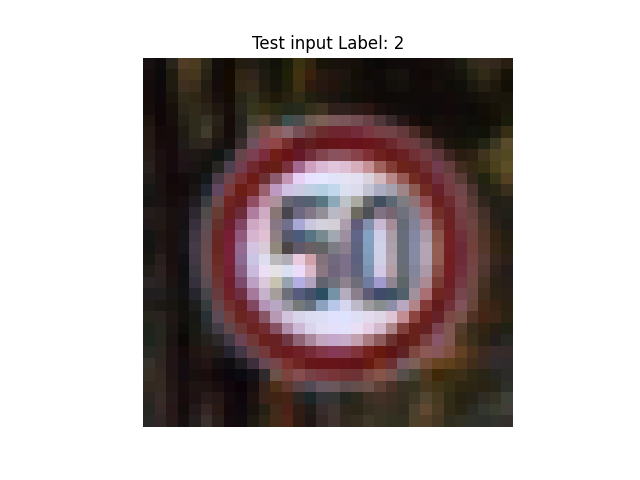

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from captum.attr import IntegratedGradients
from captum.influence import TracInCPFast
from torchvision.datasets import GTSRB

testset = torchvision.datasets.GTSRB(
    root='./data', split='test', download=True, transform=transform)

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Compute the influence function using TracInCPFast
final_fc_layer = net.fc2
checkpoints = ['./checkpoints/epoch2.pt'] # specify the path to the saved checkpoint(s)
# Create the TracInCPFast influence function
influence = TracInCPFast(net, final_fc_layer, trainset, checkpoints, loss_fn=criterion)

# Choose a test sample with the label 
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)
for inputs, labels in testloader:
    #print(labels[0])
    if labels[0] == 2:
        break

input_ = inputs[0].permute(1, 2, 0)
input_ = input_.numpy()
input_ = (input_ - input_.min()) / (input_.max() - input_.min())  # Normalize data range

plt.imshow(input_, cmap='gray', vmin=0, vmax=1)
plt.title(f'Test input Label: {labels[0]}')
plt.axis('off')
plt.show()

#### Visualization Top 5 influential training samples
Visualizing influential training samples can be helpful in understanding how the model is making predictions. The code you provided computes the influence of a test sample on the model's prediction and then finds the top 5 influential training samples. It then plots these top 5 influential samples.

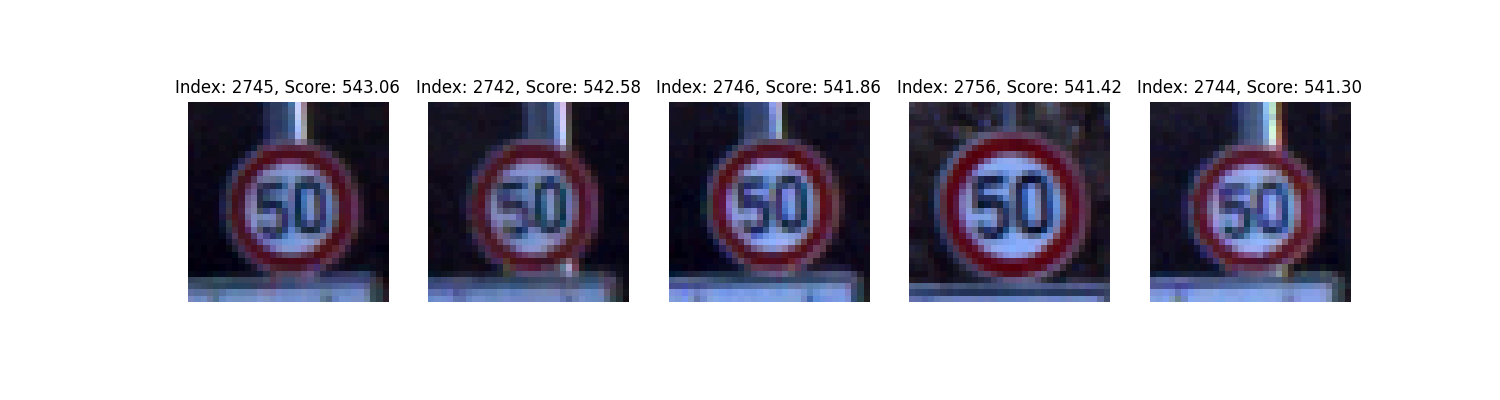

In [ ]:
proponents_indices, proponents_influence_scores = influence.influence(
    (inputs, labels), k=5, proponents=True) 

# Find the top 5 influential samples
top_influential_indices = np.argsort(-proponents_influence_scores[0])[:5]

# Plot the top 5 influential training samples
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
for i, idx in enumerate(top_influential_indices):
    input_, label_ = trainset[proponents_indices[0][idx]]
    input_ = input_.permute(1, 2, 0)
    input_ = input_.numpy()
    # Normalize data range
    input_ = (input_ - input_.min()) / (input_.max() - input_.min())
    # Use grayscale colormap and normalize data range  
    axs[i].imshow(input_, cmap='gray', vmin=0, vmax=1) 
    axs[i].set_title(f'Index: {proponents_indices[0][idx]}, Score: {proponents_influence_scores[0][idx]:.2f}')
    axs[i].axis('off')
plt.show()
